In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     413 non-null    datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [10]:
import pandas as pd
import numpy as np

file_path = "/content/drive/MyDrive/Supermarket Sales.csv"

# Define the correct column names
correct_column_names = [
    'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line',
    'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
    'cogs', 'gross margin percentage', 'gross income', 'Rating'
]

# Read the CSV, explicitly specifying the separator and skipping the header row.
# This avoids issues with malformed headers and directly loads data rows.
# Use 'latin1' encoding as a common fallback for CSV issues, though 'utf-8' is default.
df = pd.read_csv(file_path, sep=';', header=None, skiprows=1, encoding='latin1')

# Now assign the predefined correct_column_names
# First, ensure the number of columns in the loaded df matches the expected number.
if df.shape[1] == len(correct_column_names):
    df.columns = correct_column_names
else:
    print(f"Warning: Number of columns after loading ({df.shape[1]}) does not match expected ({len(correct_column_names)}).")
    print("Attempting to adjust columns to match predefined names.")
    if df.shape[1] > len(correct_column_names):
        df = df.iloc[:, :len(correct_column_names)] # Trim extra columns
        df.columns = correct_column_names
    else: # df.shape[1] < len(correct_column_names)
        # This is a more problematic scenario, as data for some columns might be missing.
        # For now, we'll assign what we can and warn.
        temp_cols = correct_column_names[:df.shape[1]]
        df.columns = temp_cols
        print(f"Critical Error: Fewer columns than expected. Loaded {df.shape[1]} columns, expected {len(correct_column_names)}. Data for {correct_column_names[df.shape[1]:]} will be missing.")


# Convert 'Date' and 'Time' columns to appropriate formats
# Use errors='coerce' to turn unparseable dates/times into NaT/NaN without crashing
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

print("DataFrame after loading and initial preprocessing:")
display(df.head())
df.info()

Attempting to adjust columns to match predefined names.
DataFrame after loading and initial preprocessing:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,NaT,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     413 non-null    datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [11]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,413,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-06-15 02:15:58.837772544,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-03-03 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-06-03 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-09-03 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-12-03 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


In [12]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [13]:
df = df.drop(columns=['cogs', 'Tax 5%', 'gross income'], axis=1, errors='ignore')

print("Columns after attempting to remove data leakage features:")
print(df.columns)

# --- هذا الكود هو نقطة بداية عملية التحسين بإزالة ميزات تسرب البيانات ---

Columns after attempting to remove data leakage features:
Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Total', 'Date', 'Time',
       'Payment', 'gross margin percentage', 'Rating'],
      dtype='object')


In [14]:
X = df.drop('Total', axis=1) # Redefine X from the updated df
y = df['Total'] # Redefine y

# Drop identifier and datetime columns BEFORE one-hot encoding
X = X.drop(columns=['Invoice ID', 'Date', 'Time'], axis=1)

# Apply one-hot encoding to the remaining categorical variables
X = pd.get_dummies(X, drop_first=True)

# Ensure all columns in X are numeric before splitting and scaling
X = X.select_dtypes(include=np.number)

print(f"X shape after dropping non-numeric columns and one-hot encoding: {X.shape}")

# Re-split the data into training, validation, and test sets (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Rescale the features using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to pandas DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

display(X_train_scaled.head())
display(X_val_scaled.head())
display(X_test_scaled.head())

X shape after dropping non-numeric columns and one-hot encoding: (1000, 4)
X_train shape: (700, 4)
y_train shape: (700,)
X_val shape: (150, 4)
y_val shape: (150,)
X_test shape: (150, 4)
y_test shape: (150,)
X_train_scaled shape: (700, 4)
X_val_scaled shape: (150, 4)
X_test_scaled shape: (150, 4)


,Unit price,Quantity,gross margin percentage,Rating
541,0.785304,-1.553425,8.881784e-16,0.057997
440,-1.438708,-0.188205,8.881784e-16,0.641300
482,-0.688998,-0.188205,8.881784e-16,-1.166938
422,1.597046,1.518319,8.881784e-16,0.991281
778,-1.141488,-0.188205,8.881784e-16,-0.525306


,Unit price,Quantity,gross margin percentage,Rating
381,-1.089731,-1.212120,8.881784e-16,-1.633581
959,1.652228,1.177014,8.881784e-16,0.816290
49,1.042185,1.518319,8.881784e-16,0.524639
60,-1.160897,-0.870815,8.881784e-16,1.749574
587,-0.463704,-0.188205,8.881784e-16,0.407978


,Unit price,Quantity,gross margin percentage,Rating
557,1.646900,1.518319,8.881784e-16,-1.458590
798,1.428457,-1.553425,8.881784e-16,1.632914
977,-1.090112,0.153100,8.881784e-16,-1.225269
136,-1.101148,-0.188205,8.881784e-16,1.049611
575,0.991950,0.494405,8.881784e-16,-0.408645


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model with a specified random state for reproducibility
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the scaled training data
rf_regressor.fit(X_train_scaled, y_train)

print("RandomForestRegressor model trained successfully with new splits.")

RandomForestRegressor model trained successfully with new splits.


In [16]:
predictions = rf_regressor.predict(X_test_scaled)

print("Predictions generated successfully on new test set.")
print(f"First 5 predictions: {predictions[:5]}")

Predictions generated successfully on new test set.
First 5 predictions: [1022.36694    97.60968   174.133365  133.198905  592.17417 ]


In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R-squared
r2 = r2_score(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Print the evaluation metrics
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared (R²): 0.9992
Mean Squared Error (MSE): 50.2233
Mean Absolute Error (MAE): 5.0157


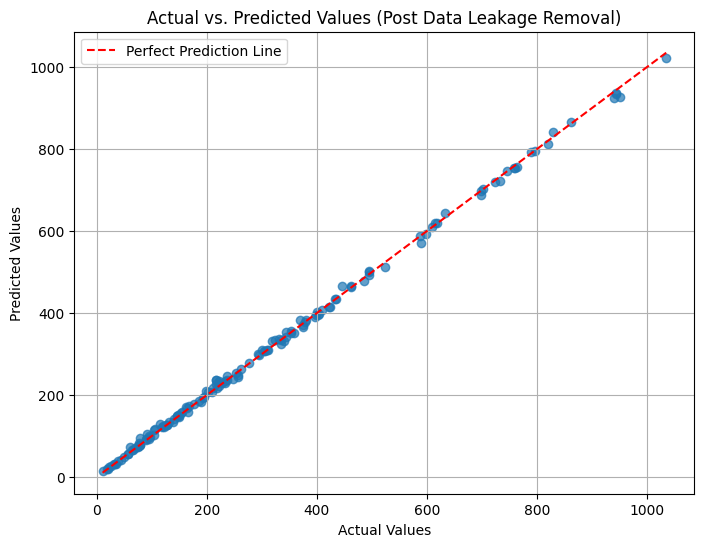

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Post Data Leakage Removal)')

# Add a diagonal line for perfect predictions
# Determine the range for the diagonal line
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize KFold with n_splits (e.g., 5 or 10) and shuffle=True and random_state=42 for reproducibility.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a new RandomForestRegressor model, with the same parameters used previously (e.g., random_state=42).
rf_model_cv = RandomForestRegressor(random_state=42)

# Use cross_val_score to evaluate the model's performance on X_train_scaled and y_train using the initialized cv.
# Set scoring='neg_mean_squared_error' to get MSE scores.
mse_scores = cross_val_score(
    rf_model_cv,
    X_train_scaled,
    y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)

# Convert negative MSE scores to positive MSE
positive_mse_scores = -mse_scores

# Print the mean and standard deviation of the cross-validation MSE scores.
print(f"Mean Cross-Validation MSE (Post Data Leakage Removal): {np.mean(positive_mse_scores):.4f}")
print(f"Standard Deviation of Cross-Validation MSE (Post Data Leakage Removal): {np.std(positive_mse_scores):.4f}")

Mean Cross-Validation MSE (Post Data Leakage Removal): 124.2550
Standard Deviation of Cross-Validation MSE (Post Data Leakage Removal): 33.6669
